## Домашняя работа

Будем работать с датасетом подержанных машин https://www.kaggle.com/adityadesai13/used-car-dataset-ford-and-mercedes.

Задача - построить прогноз цены машины по ее данным (год выпуска, пробег, расход, размер двигателя, тип коробки передач и тд).

Это задача регрессии, поэтому нужно использовать модели регрессоры, а не классификаторы (например, не StackingClassifier, а StackingRegressor).

# Easy

Взять один файл с маркой машины.
Построить прогноз, используя модели линейной регрессии и случайного леса. Сравнить результаты, используя кросс-валидацию. Подобрать гиперпараметры моделей (для линейной регрессии можно использовать реализацию с градиентным спуском SGDRegressor). Оценить качество, используя метрику r2_score. Оценить важность признаков (параметр feature_importance_ у случайного леса).

In [246]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
# from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import SGDRegressor

In [247]:
data = pd.read_csv('C:\\Users\\UserOfPC\\Downloads\\brunoyam\\data\\vw.csv', sep=',', quoting=3, engine='python')
data

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,145,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,145,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,145,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,145,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,150,39.8,1.5
...,...,...,...,...,...,...,...,...,...
15152,Eos,2012,5990,Manual,74000,Diesel,125,58.9,2.0
15153,Fox,2008,1799,Manual,88102,Petrol,145,46.3,1.2
15154,Fox,2009,1590,Manual,70000,Petrol,200,42.0,1.4
15155,Fox,2006,1250,Manual,82704,Petrol,150,46.3,1.2


Сделаем глубокую копию нашего датасета, работать будем с датасетом data

In [248]:
data_clean = data.copy(deep = True)

In [249]:
data.info

<bound method DataFrame.info of         model  year  price transmission  mileage fuelType  tax   mpg  \
0       T-Roc  2019  25000    Automatic    13904   Diesel  145  49.6   
1       T-Roc  2019  26883    Automatic     4562   Diesel  145  49.6   
2       T-Roc  2019  20000       Manual     7414   Diesel  145  50.4   
3       T-Roc  2019  33492    Automatic     4825   Petrol  145  32.5   
4       T-Roc  2019  22900    Semi-Auto     6500   Petrol  150  39.8   
...       ...   ...    ...          ...      ...      ...  ...   ...   
15152     Eos  2012   5990       Manual    74000   Diesel  125  58.9   
15153     Fox  2008   1799       Manual    88102   Petrol  145  46.3   
15154     Fox  2009   1590       Manual    70000   Petrol  200  42.0   
15155     Fox  2006   1250       Manual    82704   Petrol  150  46.3   
15156     Fox  2007   2295       Manual    74000   Petrol  145  46.3   

       engineSize  
0             2.0  
1             2.0  
2             2.0  
3             2.0  
4  

In [250]:
data.groupby(['model'])['price'].count()

model
 Amarok              111
 Arteon              248
 Beetle               83
 CC                   95
 Caddy                 6
 Caddy Life            8
 Caddy Maxi            4
 Caddy Maxi Life      59
 California           15
 Caravelle           101
 Eos                   7
 Fox                   4
 Golf               4863
 Golf SV             268
 Jetta                32
 Passat              915
 Polo               3287
 Scirocco            242
 Sharan              260
 Shuttle              61
 T-Cross             300
 T-Roc               733
 Tiguan             1765
 Tiguan Allspace      91
 Touareg             363
 Touran              352
 Up                  884
Name: price, dtype: int64

Всего 27 групп - моделей марки VW

In [251]:
data.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

NaN значений в таблице - нет

In [252]:
Посмотрим на коррелицию признаков на тепловой карте

SyntaxError: invalid syntax (1738426505.py, line 1)

C:\Users\UserOfPC\AppData\Local\Temp\ipykernel_6496\1849917550.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(), cmap ="Reds", annot = True)


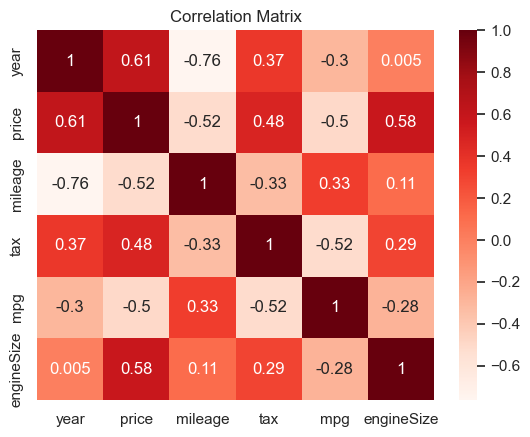

In [253]:
sns.heatmap(data.corr(), cmap ="Reds", annot = True)
plt.title("Correlation Matrix")
plt.show()

Видно, что существует высокая положительная корреляция между ценой и годом выпуска, а также между ценой и размером двигателя. Это значит что, чем новее год, тем выше цена, а также чем больше объем двигателя, тем также выше цена авто.

Однако, есть и отрицательная корреляция - между ценой и пробегом, например. Это означает, что чем больше пробег у авто, тем сильнее это снижает цену.

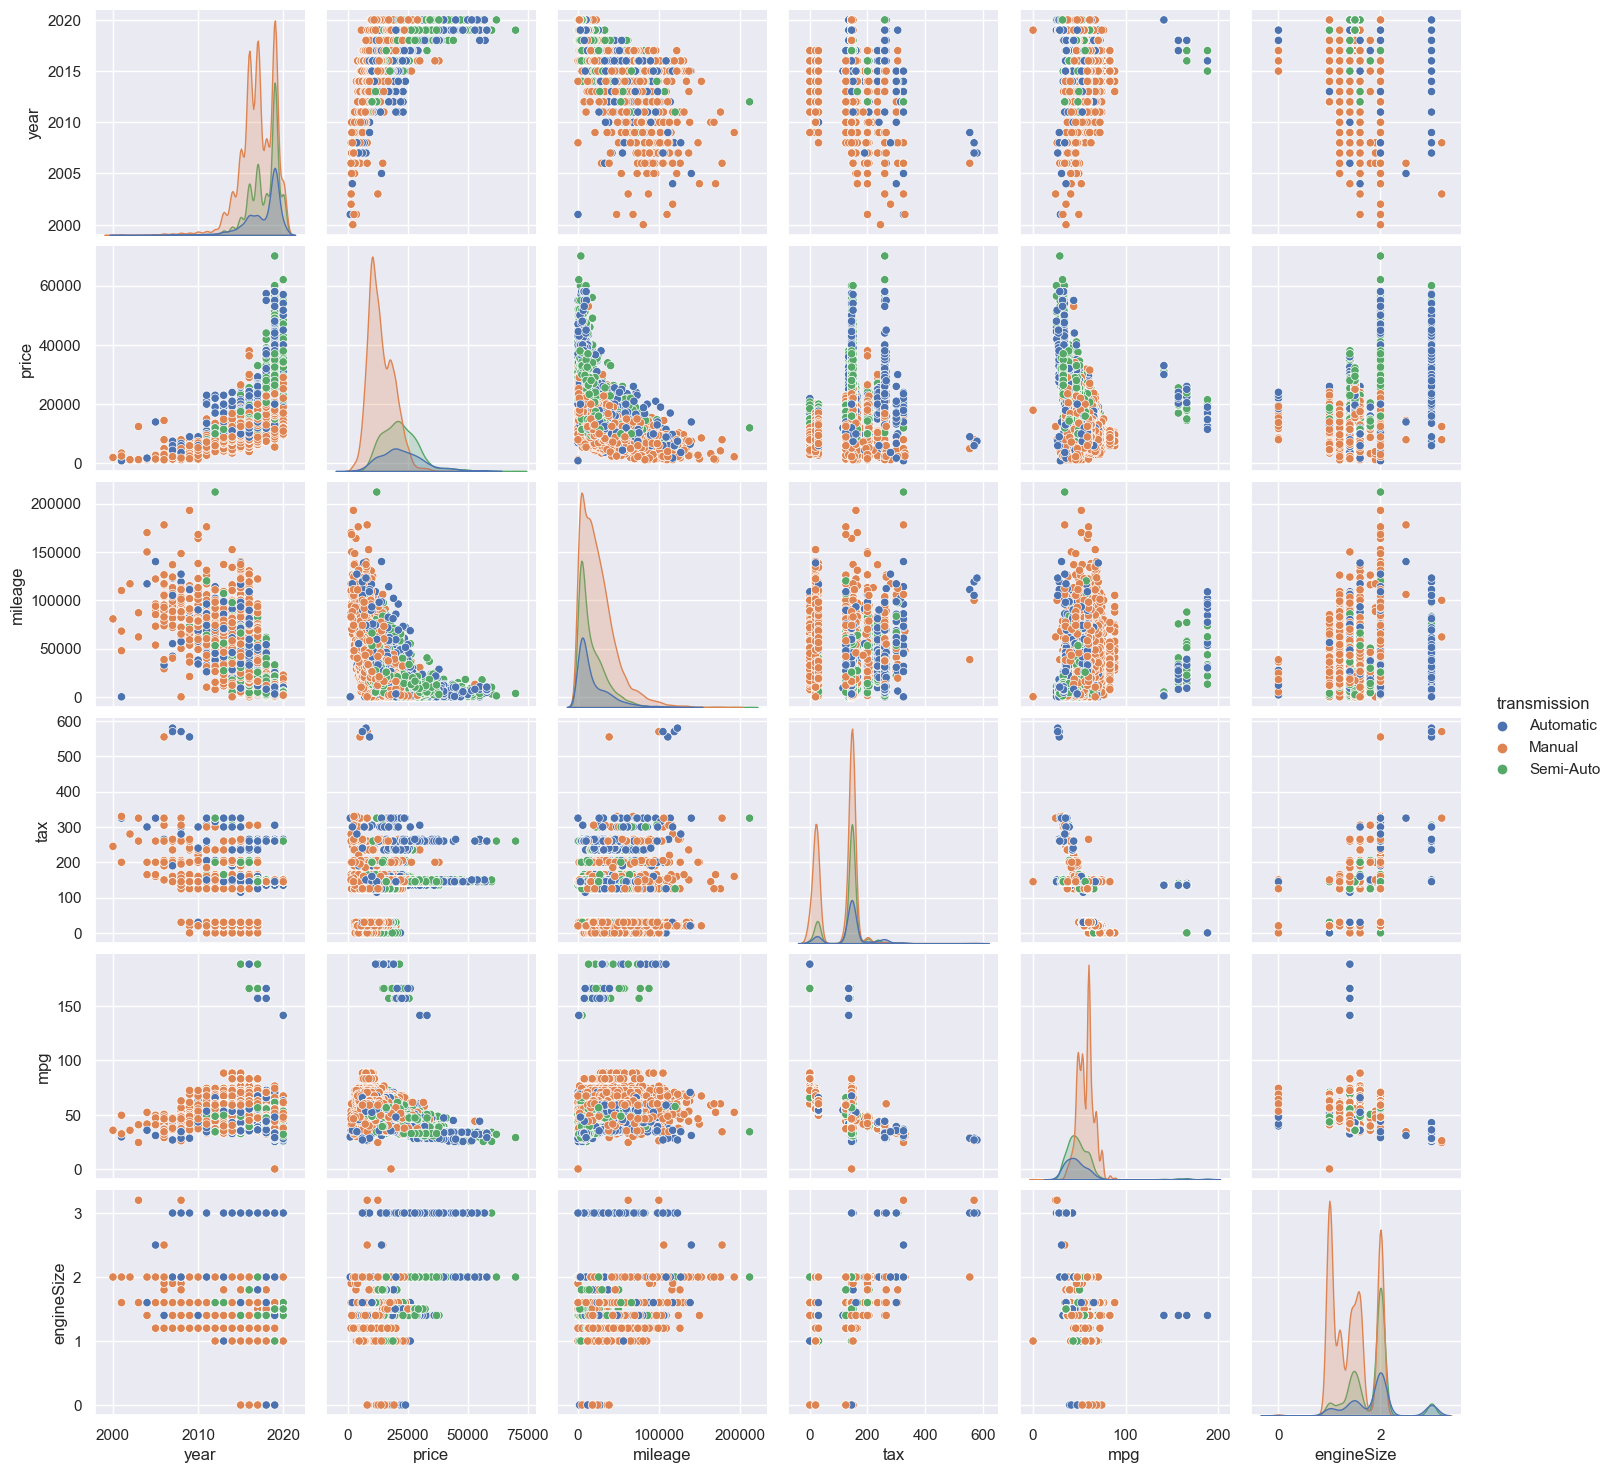

In [254]:
sns.pairplot(data, hue='transmission')

Из графиков видим некоторые зависимости признаков от типа коробки передач:
    
    1. В более старых авто преобладают механические К.П., цена на такие авто гораздо ниже остальных.
    
    2. В авто с 2012 г. стали встречаться К.П. полу-автоматические. Цена на такие авто выше чем на авто с механикой.
    
    3. В современных авто цена на автомобили с автоматической и полу-автоматической К.П. гораздо выше, чем с механикой.

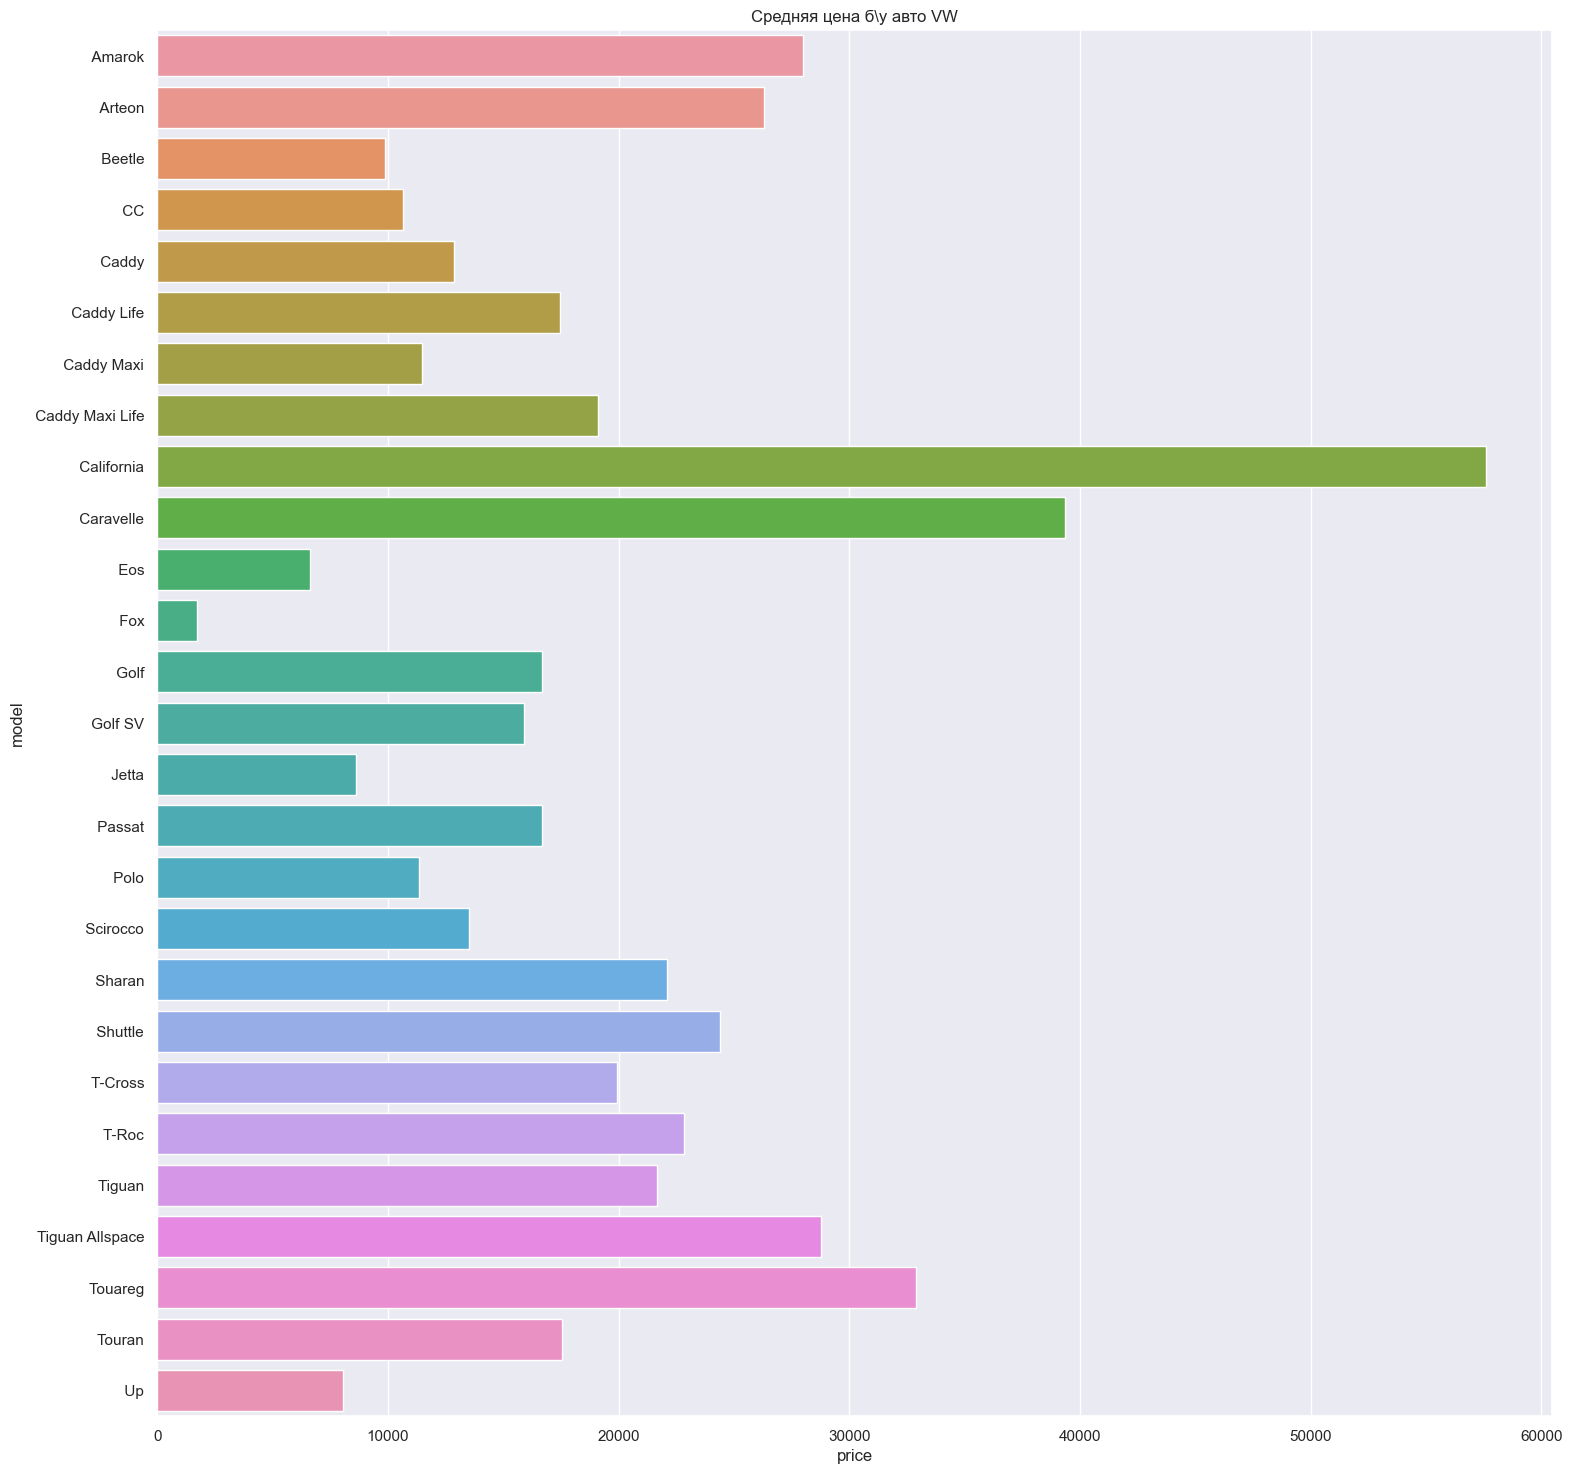

In [255]:
plt.subplots(figsize = (18,18))
data_price_Model = data.groupby("model")['price'].mean().reset_index()
sns.barplot(x = 'price', y = 'model', data = data_price_Model)
plt.title("Средняя цена б\у авто VW")
plt.show()

С большим отрывом по цене - Volkswagen California — это многофункциональный минивэн, с полностью оборудованной кухней и подъемной крышей.

Посмотрим на графиках на попарную зависимость всех признаков

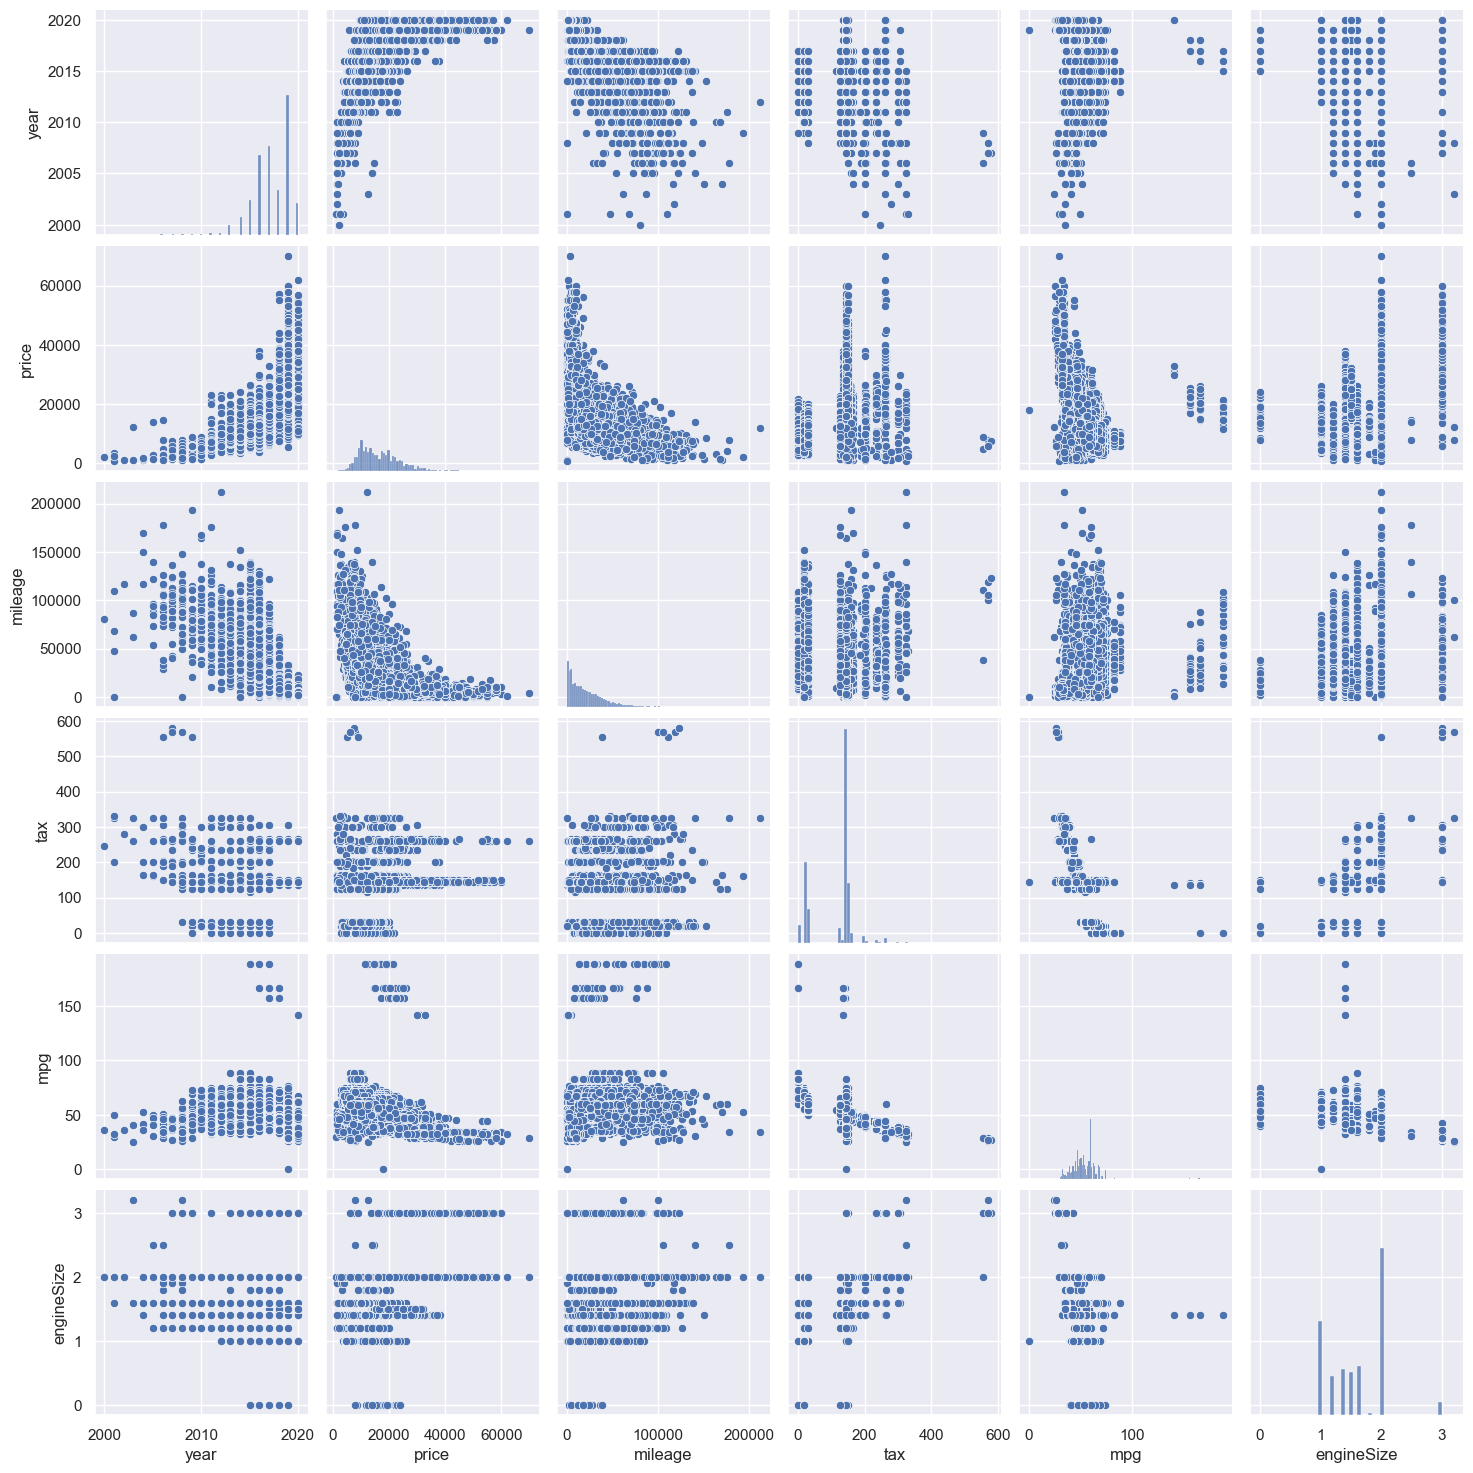

In [256]:
sns.pairplot(data)

Закодируем текстовые данные, а затем нормализуем все данные.

In [257]:
encoder = LabelEncoder()
data['model'] = encoder.fit_transform(data['model'])
model_cat = {index : label for index, label in enumerate(encoder.classes_)}
model_cat

{0: ' Amarok',
 1: ' Arteon',
 2: ' Beetle',
 3: ' CC',
 4: ' Caddy',
 5: ' Caddy Life',
 6: ' Caddy Maxi',
 7: ' Caddy Maxi Life',
 8: ' California',
 9: ' Caravelle',
 10: ' Eos',
 11: ' Fox',
 12: ' Golf',
 13: ' Golf SV',
 14: ' Jetta',
 15: ' Passat',
 16: ' Polo',
 17: ' Scirocco',
 18: ' Sharan',
 19: ' Shuttle',
 20: ' T-Cross',
 21: ' T-Roc',
 22: ' Tiguan',
 23: ' Tiguan Allspace',
 24: ' Touareg',
 25: ' Touran',
 26: ' Up'}

In [258]:
data['transmission'] = encoder.fit_transform(data['transmission'])
transmission_cat= {index : label for index, label in enumerate(encoder.classes_)}
transmission_cat

{0: 'Automatic', 1: 'Manual', 2: 'Semi-Auto'}

In [259]:
data['fuelType'] = encoder.fit_transform(data['fuelType'])
fuelType_cat= {index : label for index, label in enumerate(encoder.classes_)}
fuelType_cat

{0: 'Diesel', 1: 'Hybrid', 2: 'Other', 3: 'Petrol'}

In [285]:
x = data.drop('price', axis = 1)
y = data['price']
y

0        25000
1        26883
2        20000
3        33492
4        22900
         ...  
15152     5990
15153     1799
15154     1590
15155     1250
15156     2295
Name: price, Length: 15157, dtype: int64

In [286]:
# scaler = MinMaxScaler(copy = True, feature_range = (0,1))
# X = scaler.fit_transform(x)
# x

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
0,21,2019,0,13904,0,145,49.6,2.0
1,21,2019,0,4562,0,145,49.6,2.0
2,21,2019,1,7414,0,145,50.4,2.0
3,21,2019,0,4825,3,145,32.5,2.0
4,21,2019,2,6500,3,150,39.8,1.5
...,...,...,...,...,...,...,...,...
15152,10,2012,1,74000,0,125,58.9,2.0
15153,11,2008,1,88102,3,145,46.3,1.2
15154,11,2009,1,70000,3,200,42.0,1.4
15155,11,2006,1,82704,3,150,46.3,1.2


In [303]:
X = (X - X.mean()) / X.std()
X

array([[ 1.04610532,  1.4766992 , -1.39780589, ..., -0.64135718,
        -0.60433948,  0.49331588],
       [ 1.04610532,  1.4766992 , -1.39780589, ..., -0.64135718,
        -0.60433948,  0.49331588],
       [ 1.04610532,  1.4766992 ,  0.11509152, ..., -0.64135718,
        -0.59146376,  0.49331588],
       ...,
       [-0.11766193, -0.03619822,  0.11509152, ..., -0.35442836,
        -0.72665885, -0.07402065],
       [-0.11766193, -0.49006744,  0.11509152, ..., -0.61527275,
        -0.65745184, -0.26313283],
       [-0.11766193, -0.3387777 ,  0.11509152, ..., -0.64135718,
        -0.65745184, -0.26313283]])

In [288]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

In [289]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [290]:
y_pred = model.predict(X_test)

y_pred


array([17549.39708214, 28567.46203358, 25720.22366929, ...,
       25221.93177856, 24318.68746154, 12907.72797553])

In [291]:
y_test

7624     15390
11594    31490
4316     25250
3958     15990
2338     26995
         ...  
4978     23940
14689    17595
10774    27995
4564     29555
7413     10499
Name: price, Length: 3032, dtype: int64

In [292]:
mean_squared_error(y_test, y_pred)

15733256.419094874

In [304]:
pricePredicted = pd.DataFrame({'Actual Price': y_test, 'Predicted Price': y_pred})
pricePredicted

,Actual Price,Predicted Price
7624,15390,17549.397082
11594,31490,28567.462034
4316,25250,25720.223669
3958,15990,19566.407780
2338,26995,24775.953524
...,...,...
4978,23940,23978.117143
14689,17595,18490.907530
10774,27995,25221.931779
4564,29555,24318.687462


R2 вычислим (коэффициент детерминации) функция оценки регрессии.

In [294]:
r2 = r2_score(y_pred, y_test)
r2

0.6537500493504974

Коэффициент детерминации для модели с константой принимает значения от 0 до 1. Чем ближе значение коэффициента к 1, тем сильнее зависимость. При оценке регрессионных моделей это интерпретируется как соответствие модели данным. Для приемлемых моделей предполагается, что коэффициент детерминации должен быть хотя бы не меньше 50 % (в этом случае коэффициент множественной корреляции превышает по модулю 70 %). Модели с коэффициентом детерминации выше 80 % можно признать достаточно хорошими (коэффициент корреляции превышает 90 %). Значение коэффициента детерминации 1 означает функциональную зависимость между переменными.

In [295]:
model2 = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.4)

In [296]:
model2.fit(X_train, y_train)

SGDRegressor(eta0=0.4, penalty=None)

In [305]:
y_pred2 = model2.predict(X_test)
y_pred2

array([17678.16302146, 28070.00181706, 24774.01886255, ...,
       26095.43626709, 23954.47229532, 12878.16291689])

In [306]:
r2_2 = r2_score(y_pred2, y_test)
r2_2

0.6546732725322125

In [299]:
model3 = RandomForestClassifier(n_estimators=100)
model3.fit(X_train, y_train)

y_pred3 = model.predict(X_test)

In [300]:
r2_3 = r2_score(y_pred3, y_test)
r2_3

0.6537500493504974

In [308]:
# dataX = x.drop('price', axis = 1)
# feature_names = list(dataX)
# feature_imp = pd.Series(model3.feature_importances_,index=feature_names).sort_values(ascending=False)
# feature_imp


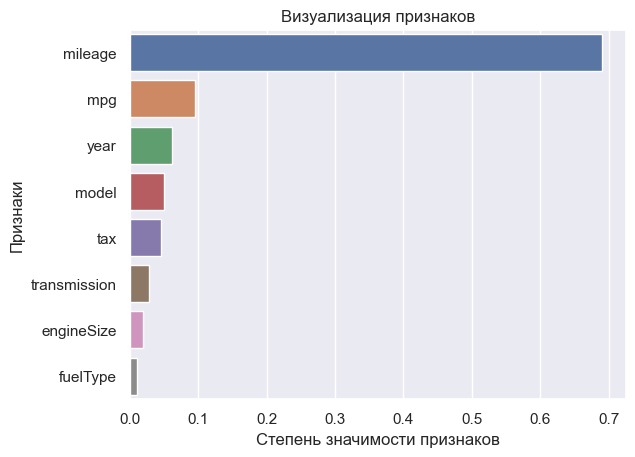

In [302]:
sns.barplot(x=feature_imp, y=feature_imp.index)

plt.xlabel('Степень значимости признаков')
plt.ylabel('Признаки')
plt.title('Визуализация признаков')
plt.show()

Переобучим нашу модель случайного леса только на наиболее значимом признаке

In [318]:
X = data[['mileage']]
X = (X - X.mean()) / X.std()
y = data['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)


In [319]:
model4 = RandomForestClassifier()
model4 .fit(X_train,y_train)

y_pred4 = model4.predict(X_test)

r2_4 = r2_score(y_pred4, y_test)
r2_4

-0.2847400957033215

Видим, что наиболее весомы признак, влияющий на цену - пробег. После удаления наименее важных показателей (оставляем только один признак - пробег) точность увеличилась.